The first step–before we start to build a model–is always to take a closer look at the data by analyzing
some statistics of the data set. In this step, you can already gain some insights into the data which can
help you build your model and interpret your results later on.
Look into the provided data set by e.g. plotting the individual features. Based on your analysis,
answer the following questions:
(i) Which are the numerical features and which are the categorical features?
(ii) Is there a greater trend to need an increase in the availability of bicycles? Study this question
from various perspectives:
• Can any trend be seen comparing different hours, weeks, and months?
• Is there any difference between weekdays and holidays?
• Is there any trend depending on the weather? Rainy days, snowy days, etc.
Write concise answers to each question and support your findings with evidence (statistics, plots,
etc.). Discuss the results. Additionally, you can explore the correlation of features, outliers, range of
values, and many more aspects

ModuleNotFoundError: No module named 'matplotlib'

NameError: name 'no_holiday_high' is not defined

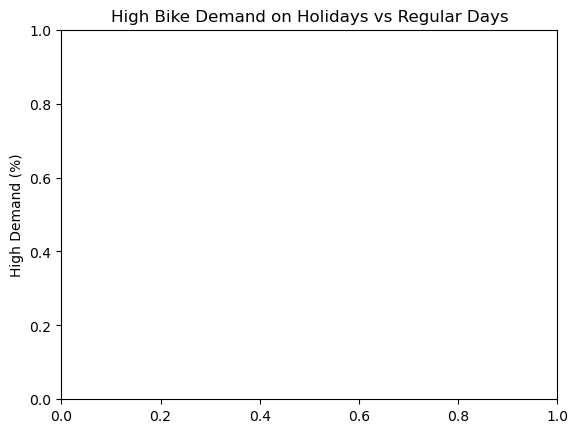

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("training_data_ht2025.csv")


plt.ylabel('High Demand (%)')
plt.title('High Bike Demand on Holidays vs Regular Days')
for i, v in enumerate([no_holiday_high, holiday_high]):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
plt.ylim(0, 100)

In [8]:
import pandas as pd

df = pd.read_csv("training_data_ht2025.csv")
print(df)



      hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1595            3            5      6        0        0           1  21.5   
1596           14            0      6        0        1           1  23.2   
1597           13            0      3        0        1           1  13.9   
1598           14            5      3        0        0           1  11.7   
1599           22            6      2        0        0           0   4.2   

       dew  humidity  precip  snow  snowdepth  windspeed  cloudcover  \
0  